In [1]:
import numpy as np 
import tensorflow 
from tensorflow import keras 
import matplotlib as plt 
import seaborn 
import glob 
import os
from os import listdir 

from keras.preprocessing.image import ImageDataGenerator

import skimage 
from skimage.io import imread_collection
from skimage.io import imshow_collection
from skimage.io import concatenate_images 
from matplotlib import pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Sequential 

from PIL import Image

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    print (dirname)

/kaggle/input
/kaggle/input/intel-image-classification
/kaggle/input/intel-image-classification/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain
/kaggle/input/intel-image-classification/seg_train/seg_train/street
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings
/kaggle/input/intel-image-classification/seg_train/seg_train/sea
/kaggle/input/intel-image-classification/seg_train/seg_train/forest
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier
/kaggle/input/intel-image-classification/seg_pred
/kaggle/input/intel-image-classification/seg_pred/seg_pred
/kaggle/input/intel-image-classification/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test/mountain
/kaggle/input/intel-image-classification/seg_test/seg_test/street
/kaggle/input/intel-image-classification/seg_test/seg_test/buildings
/

In [3]:
# Importing the data and preprocessing 
from keras.preprocessing.image import ImageDataGenerator 


# set the directory based on the folder where you saved dataset
train_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_data_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)  

train_data = image_generator.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir,
                                                 shuffle=True,
                                                 target_size=(64,64), 
                                                 subset="training",
                                                 class_mode='categorical')

val_data = image_generator.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir,
                                                 shuffle=False,
                                                 target_size=(64,64), 
                                                 subset="validation",
                                                 class_mode='categorical')
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(test_data_dir,
                                       target_size=(64,64), batch_size=64, shuffle=False)


print(train_data.classes)
print(val_data.classes)
print(train_data.class_indices)
print(test_data.classes)
class_names = np.unique(train_data.classes)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
[0 0 0 ... 5 5 5]


In [4]:
# Making the baseline model 

model = keras.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (64, 64, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))

model.summary()

2022-10-07 17:08:28.564229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 17:08:28.686189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 17:08:28.687176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 17:08:28.689342: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [5]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, epochs=20, batch_size=64, validation_data = val_data)
test_loss, test_acc = model.evaluate((test_data))

2022-10-07 17:08:32.465950: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-10-07 17:08:34.703199: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


176/176 [==============================] - 89s 458ms/step - loss: 1.1357 - accuracy: 0.5528 - val_loss: 1.0376 - val_accuracy: 0.5959
Epoch 2/20
176/176 [==============================] - 25s 143ms/step - loss: 0.8836 - accuracy: 0.6557 - val_loss: 0.8137 - val_accuracy: 0.7083
Epoch 3/20
176/176 [==============================] - 24s 138ms/step - loss: 0.7183 - accuracy: 0.7324 - val_loss: 0.6596 - val_accuracy: 0.7600
Epoch 4/20
176/176 [==============================] - 22s 127ms/step - loss: 0.6231 - accuracy: 0.7749 - val_loss: 0.7215 - val_accuracy: 0.7354
Epoch 5/20
176/176 [==============================] - 22s 127ms/step - loss: 0.5653 - accuracy: 0.7948 - val_loss: 0.6255 - val_accuracy: 0.7739
Epoch 6/20
176/176 [==============================] - 22s 127ms/step - loss: 0.5037 - accuracy: 0.8203 - val_loss: 0.5460 - val_accuracy: 0.8088
Epoch 7/20
176/176 [==============================] - 23s 132ms/step - loss: 0.4643 - accuracy: 0.8354 - val_loss: 0.5194 - val_accuracy: 0.8

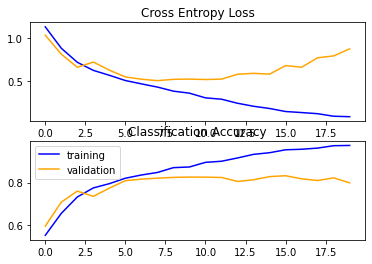

In [6]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend(['training', 'validation'])
	plt.show()
 
summarize_diagnostics(history)

ROC AUC score: 0.8826919307203572


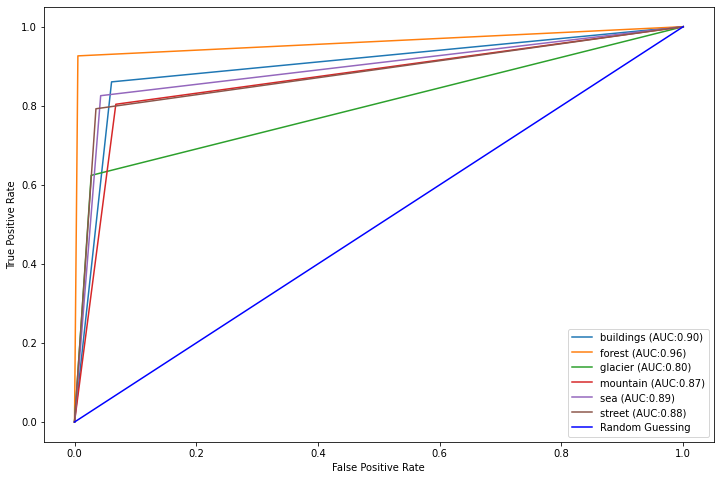

In [7]:
# Getting predicted label and ground truth label 

ypred = model.predict(test_data)
ypred = ypred.argmax(axis = -1)

ytest = test_data.classes

# Plotting the ROC-curve 

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer 
from sklearn.metrics import roc_curve, auc, roc_auc_score 

target = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Setting plot figure size 

fig, c_ax = plt.subplots(1, 1, figsize = (12, 8))

# Function for drawing ROC-curve and AUC for multi-class

def multiclass_roc_auc_score(y_test, y_pred, average = "macro"): 
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(ytest, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

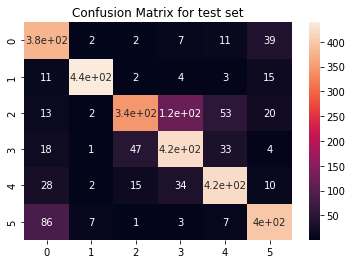

In [8]:
# Confusion Matrix for train data 

from sklearn.metrics import confusion_matrix 

predictions = model.predict(test_data)
pred_labels = np.argmax(predictions, axis = -1) 
                        
CM = confusion_matrix(test_data.classes, pred_labels)
ax = plt.axes()
seaborn.heatmap(CM, annot = True,
          annot_kws = {"size" : 10},
          xticklabels = class_names,
          yticklabels = class_names, ax = ax)
ax.set_title('Confusion Matrix for test set')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

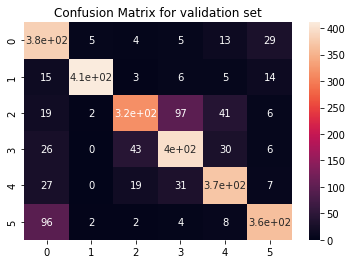

In [9]:
# Confusion Matrix for validation data 

predictions_val = model.predict(val_data)
pred_val_labels = np.argmax(predictions_val, axis = -1)

CM2 = confusion_matrix(val_data.classes, pred_val_labels)
ax = plt.axes()
seaborn.heatmap(CM2, annot = True,
          annot_kws = {"size" : 10},
          xticklabels = class_names,
          yticklabels = class_names, ax = ax)
ax.set_title('Confusion Matrix for validation set')
plt.show


In [10]:
# Reporting the performance measures 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Train 
pred_labels = model.predict(train_data)
pred_labels = pred_labels.argmax(axis = -1) 
ytrain = train_data.classes 

# Test 
ypred = model.predict(test_data)
ypred = ypred.argmax(axis = -1)
ytest = test_data.classes

# Accuracy
def accuracy(ground_truth, predictions):
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(ground_truth):        
        if m==predictions[l] and m==1:
            tp+=1
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==1:
            fn+=1
        if m!=predictions[l] and m==0:
            fp+=1
    return tn/(tn+fp)

train_accuracy = accuracy(ytrain, pred_labels)
test_accuracy = accuracy(ytest, ypred)

# Specificity 
def specificity(ground_truth, predictions):
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(ground_truth):        
        if m==predictions[l] and m==1:
            tp+=1
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==1:
            fn+=1
        if m!=predictions[l] and m==0:
            fp+=1
    return tn/(tn+fp)

train_specificity = specificity(ytrain, pred_labels)
test_specificity = specificity(ytest, ypred)

# Sensitivity 
def sensitivity(ground_truth, predictions):
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(ground_truth):        
        if m==predictions[l] and m==1:
            tp+=1
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==1:
            fn+=1
        if m!=predictions[l] and m==0:
            fp+=1
    return tp/(tp+fn)

train_sensitivity = sensitivity(ytrain, pred_labels)
test_sensitivity = sensitivity(ytest, ypred)

# F1-score 
def f1_score(ground_truth, predictions):
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(ground_truth):        
        if m==predictions[l] and m==1:
            tp+=1
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==1:
            fn+=1
        if m!=predictions[l] and m==0:
            fp+=1
    return (2 * tp) / (2*tp + fp + fn)

train_f1_score = f1_score(ytrain, pred_labels)
test_f1_score = f1_score(ytest, ypred)
 

# Reporting 
print("For the test set:")
print("Accuracy: ", test_accuracy)
print("Specifity: ", test_specificity)
print("Sensitivity: ", test_sensitivity)
print("F1-score: ", test_f1_score)
print()
print("For the training set: ")
print("Accuracy: ", train_accuracy)
print("Specifity: ", train_specificity)
print("Sensitivity: ", train_sensitivity)
print("F1-score: ", train_f1_score)

For the test set:
Accuracy:  0.8604118993135011
Specifity:  0.8604118993135011
Sensitivity:  0.9261603375527426
F1-score:  0.9014373716632443

For the training set: 
Accuracy:  0.16828294352538506
Specifity:  0.16828294352538506
Sensitivity:  0.15134837644468904
F1-score:  0.15492957746478872


In [11]:
# Making the second Convolutional Neural Network 

model2 = keras.Sequential()

model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (64, 64, 3), padding = 'same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model2.add(layers.Dropout(0.5)) 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation = 'relu'))
model2.add(layers.Dense(6, activation = 'softmax'))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)       

In [12]:
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(train_data, epochs=20, batch_size=64, validation_data = val_data)
test_loss, test_acc = model2.evaluate((test_data))

Epoch 1/20
176/176 [==============================] - 23s 124ms/step - loss: 1.3454 - accuracy: 0.4465 - val_loss: 1.1439 - val_accuracy: 0.6123
Epoch 2/20
176/176 [==============================] - 22s 122ms/step - loss: 1.0598 - accuracy: 0.5749 - val_loss: 0.9728 - val_accuracy: 0.6345
Epoch 3/20
176/176 [==============================] - 22s 125ms/step - loss: 0.9633 - accuracy: 0.6156 - val_loss: 0.9525 - val_accuracy: 0.6687
Epoch 4/20
176/176 [==============================] - 22s 123ms/step - loss: 0.8565 - accuracy: 0.6681 - val_loss: 0.8460 - val_accuracy: 0.7076
Epoch 5/20
176/176 [==============================] - 22s 126ms/step - loss: 0.8023 - accuracy: 0.6922 - val_loss: 0.7975 - val_accuracy: 0.7197
Epoch 6/20
176/176 [==============================] - 22s 127ms/step - loss: 0.7536 - accuracy: 0.7224 - val_loss: 0.7006 - val_accuracy: 0.7814
Epoch 7/20
176/176 [==============================] - 22s 124ms/step - loss: 0.6895 - accuracy: 0.7475 - val_loss: 0.6938 - val_ac

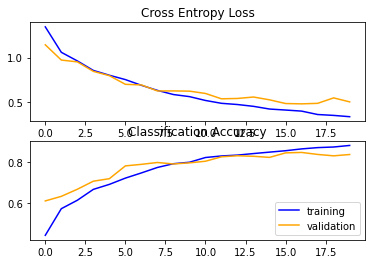

In [13]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend(['training', 'validation'])
	plt.show()
 
summarize_diagnostics(history2)

ROC AUC score: 0.8994164596985138


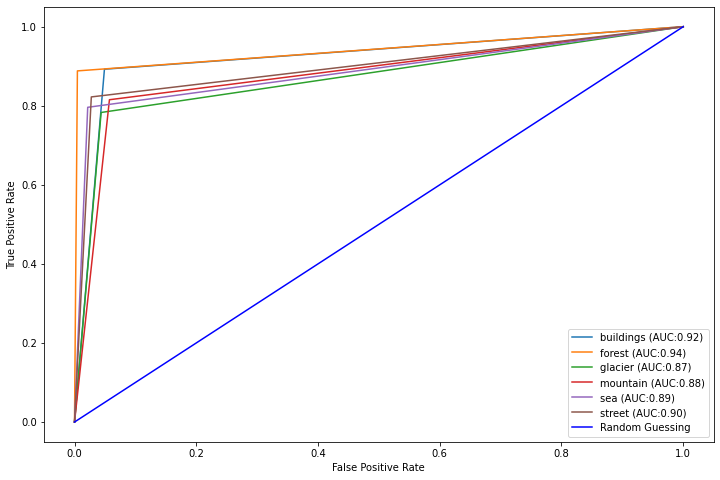

In [14]:
# Getting predicted label and ground truth label 

ypred2 = model2.predict(test_data)
ypred2 = ypred2.argmax(axis = -1)

ytest = test_data.classes

# Plotting the ROC-curve 

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer 
from sklearn.metrics import roc_curve, auc, roc_auc_score 

target = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Setting plot figure size 

fig, c_ax = plt.subplots(1, 1, figsize = (12, 8))

# Function for drawing ROC-curve and AUC for multi-class

def multiclass_roc_auc_score(y_test, y_pred, average = "macro"): 
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(ytest, ypred2))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

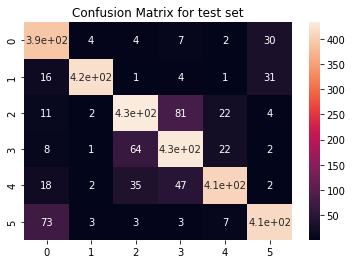

In [15]:
# Confusion Matrix for train data 

from sklearn.metrics import confusion_matrix 

predictions2 = model2.predict(test_data)
pred_labels2 = np.argmax(predictions2, axis = -1) 
                        
CM = confusion_matrix(test_data.classes, pred_labels2)
ax = plt.axes()
seaborn.heatmap(CM, annot = True,
          annot_kws = {"size" : 10},
          xticklabels = class_names,
          yticklabels = class_names, ax = ax)
ax.set_title('Confusion Matrix for test set')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

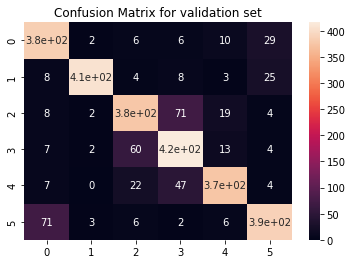

In [16]:
# Confusion Matrix for validation data 

predictions_val2 = model2.predict(val_data)
pred_val_labels2 = np.argmax(predictions_val2, axis = -1)

CM2 = confusion_matrix(val_data.classes, pred_val_labels2)
ax = plt.axes()
seaborn.heatmap(CM2, annot = True,
          annot_kws = {"size" : 10},
          xticklabels = class_names,
          yticklabels = class_names, ax = ax)
ax.set_title('Confusion Matrix for validation set')
plt.show
